                  
                  Starbucks Promotional Campaign Data Analysis and Customer Segmentation

                                        Introduction
This case study analyizes data provided by Starbucks that simulates their customer demographics and transactional activities during a promotional campaign. The campaign lasted for one month, during which customers received a variaty of offers. The purpose of this case study is to understand customer response to different offers in order to come up with better approaches to sending customers specific promotional deals. Customers are classified into segments based on their transactional activities, so that specific recommendations can be given regarding individual segments to improve customer stickiness, brand awareness and increase revenue in general. Customer segmentation also provides insights on new customer targeting 

In [110]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [111]:
data=pd.read_csv("Starbucks satisfactory survey.csv")
data.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [112]:
#renaming column names for simplicity
data.columns = ['Timestamp',
              'Gender',
              'Age',
              'Occupation',
              'Annual_Income',
              'Visit_Frequency',
              'Service_preferred',
              'Time_Spent_Frequency',
              'Nearest_Store_Distance',
              'Membership',
              'Frequent_Product',
              'Avg_Money_Spent',
              'Quality_Rating_vs_Other_Brands',
              'Price_Rating',
              'Sales_Promotion_Importance',
              'Ambiance_Rating',
              'WiFi_Rating',
              'Service_Rating',
              'Meetings_hangouts_preference',
              'Promotion_Source',
              'Loyalty'
             ]
data.head()

,Timestamp,Gender,Age,Occupation,Annual_Income,Visit_Frequency,Service_preferred,Time_Spent_Frequency,Nearest_Store_Distance,Membership,...,Avg_Money_Spent,Quality_Rating_vs_Other_Brands,Price_Rating,Sales_Promotion_Importance,Ambiance_Rating,WiFi_Rating,Service_Rating,Meetings_hangouts_preference,Promotion_Source,Loyalty
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Timestamp                       122 non-null    object
 1   Gender                          122 non-null    object
 2   Age                             122 non-null    object
 3   Occupation                      122 non-null    object
 4   Annual_Income                   122 non-null    object
 5   Visit_Frequency                 122 non-null    object
 6   Service_preferred               121 non-null    object
 7   Time_Spent_Frequency            122 non-null    object
 8   Nearest_Store_Distance          122 non-null    object
 9   Membership                      122 non-null    object
 10  Frequent_Product                122 non-null    object
 11  Avg_Money_Spent                 122 non-null    object
 12  Quality_Rating_vs_Other_Brands  122 non-null    in

In [114]:
data.isna().sum()
#checking for any null values

Timestamp                         0
Gender                            0
Age                               0
Occupation                        0
Annual_Income                     0
Visit_Frequency                   0
Service_preferred                 1
Time_Spent_Frequency              0
Nearest_Store_Distance            0
Membership                        0
Frequent_Product                  0
Avg_Money_Spent                   0
Quality_Rating_vs_Other_Brands    0
Price_Rating                      0
Sales_Promotion_Importance        0
Ambiance_Rating                   0
WiFi_Rating                       0
Service_Rating                    0
Meetings_hangouts_preference      0
Promotion_Source                  1
Loyalty                           0
dtype: int64

In [115]:
# since Service_preferred  & Promotion_Source  columns have only 1 row as null delete the row!!
data=data[-data.Service_preferred.isnull()]
data=data[-data.Promotion_Source .isnull()]



In [116]:
data.isna().sum()
#checking for NAN values in the data

Timestamp                         0
Gender                            0
Age                               0
Occupation                        0
Annual_Income                     0
Visit_Frequency                   0
Service_preferred                 0
Time_Spent_Frequency              0
Nearest_Store_Distance            0
Membership                        0
Frequent_Product                  0
Avg_Money_Spent                   0
Quality_Rating_vs_Other_Brands    0
Price_Rating                      0
Sales_Promotion_Importance        0
Ambiance_Rating                   0
WiFi_Rating                       0
Service_Rating                    0
Meetings_hangouts_preference      0
Promotion_Source                  0
Loyalty                           0
dtype: int64

In [117]:
data.describe()

,Quality_Rating_vs_Other_Brands,Price_Rating,Sales_Promotion_Importance,Ambiance_Rating,WiFi_Rating,Service_Rating,Meetings_hangouts_preference
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,3.685950,2.909091,3.818182,3.760331,3.256198,3.752066,3.520661
std,0.913173,1.072381,1.064581,0.931171,0.962020,0.829468,1.033595
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [118]:
data.isna().sum()

Timestamp                         0
Gender                            0
Age                               0
Occupation                        0
Annual_Income                     0
Visit_Frequency                   0
Service_preferred                 0
Time_Spent_Frequency              0
Nearest_Store_Distance            0
Membership                        0
Frequent_Product                  0
Avg_Money_Spent                   0
Quality_Rating_vs_Other_Brands    0
Price_Rating                      0
Sales_Promotion_Importance        0
Ambiance_Rating                   0
WiFi_Rating                       0
Service_Rating                    0
Meetings_hangouts_preference      0
Promotion_Source                  0
Loyalty                           0
dtype: int64

In [119]:
num_cols = data.select_dtypes(include='int64').columns
num_cols
#grouping numerical columns

Index(['Quality_Rating_vs_Other_Brands', 'Price_Rating',
       'Sales_Promotion_Importance', 'Ambiance_Rating', 'WiFi_Rating',
       'Service_Rating', 'Meetings_hangouts_preference'],
      dtype='object')

<Axes: >

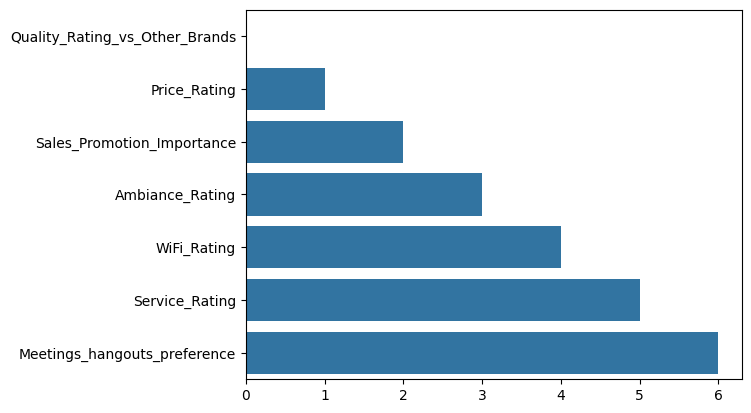

In [120]:
sns.barplot(num_cols)


<Axes: >

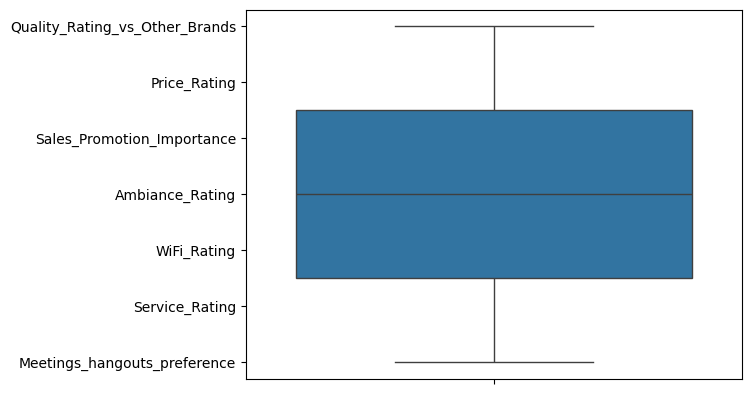

In [121]:
sns.boxplot(num_cols)
#used to check for any outliers present or not

In [122]:
cat_cols = data.select_dtypes(include='object').columns
cat_cols
#grouping categorical data columns

Index(['Timestamp', 'Gender', 'Age', 'Occupation', 'Annual_Income',
       'Visit_Frequency', 'Service_preferred', 'Time_Spent_Frequency',
       'Nearest_Store_Distance', 'Membership', 'Frequent_Product',
       'Avg_Money_Spent', 'Promotion_Source', 'Loyalty'],
      dtype='object')

CountPlot for the column: Gender


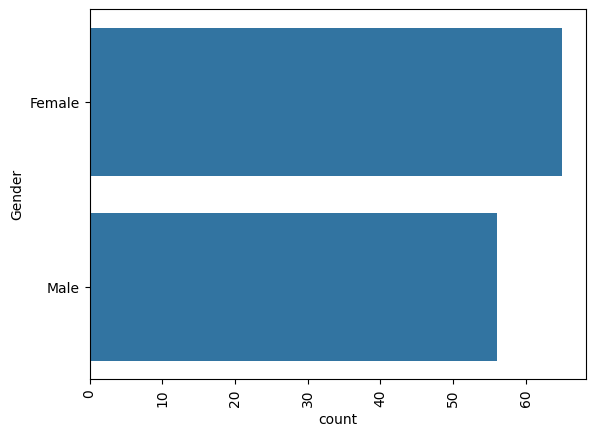

CountPlot for the column: Age


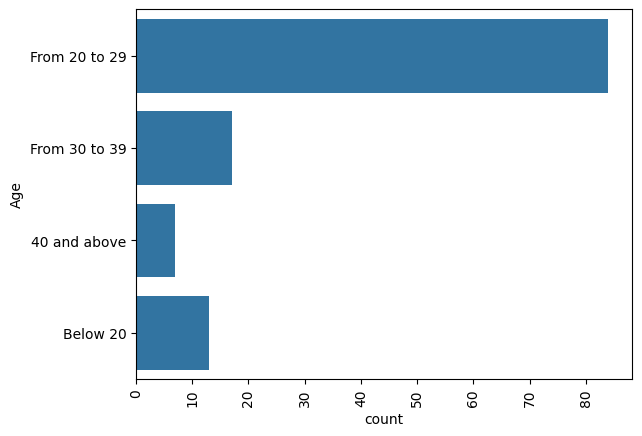

CountPlot for the column: Occupation


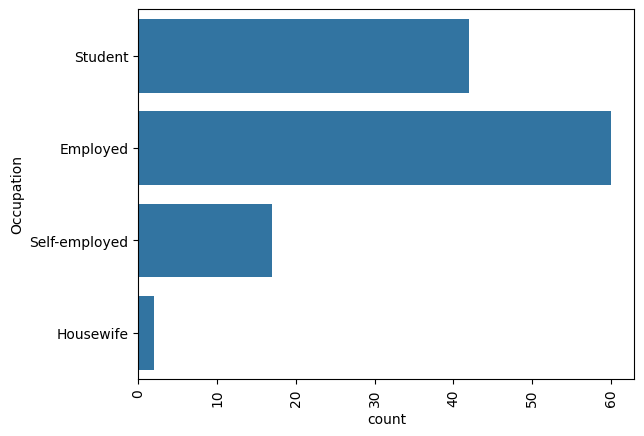

CountPlot for the column: Annual_Income


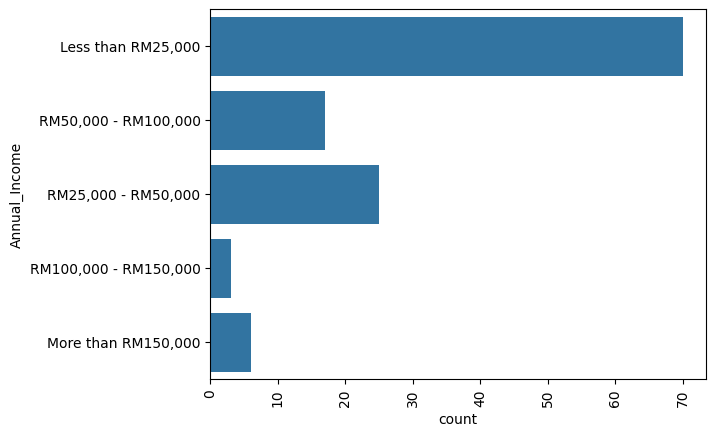

CountPlot for the column: Visit_Frequency


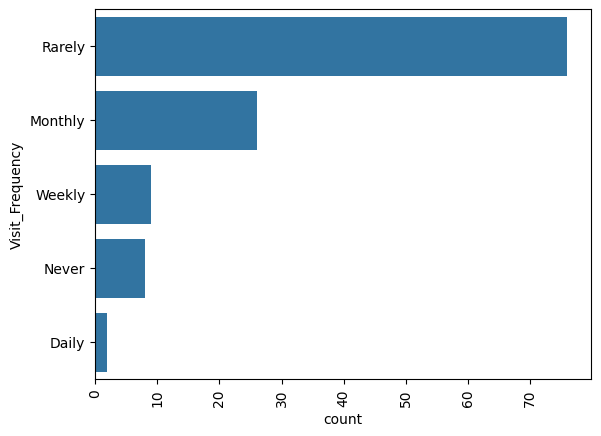

CountPlot for the column: Service_preferred


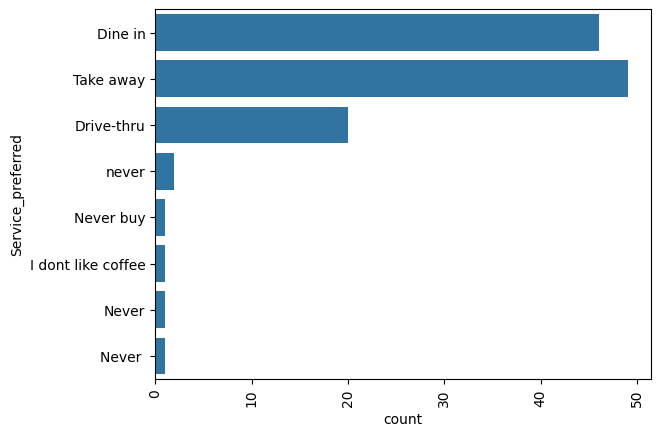

CountPlot for the column: Time_Spent_Frequency


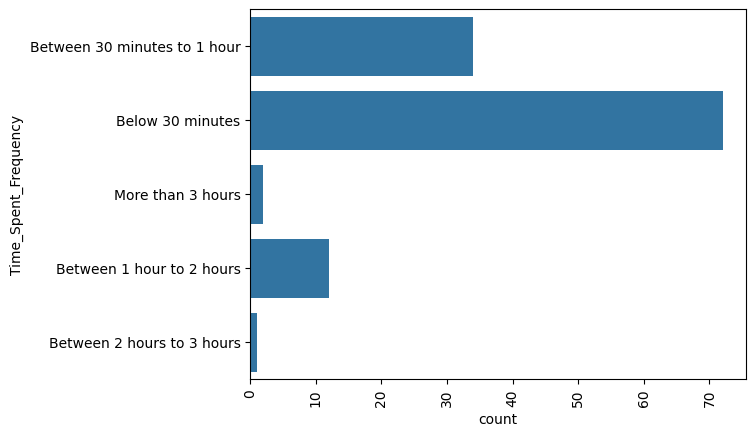

CountPlot for the column: Nearest_Store_Distance


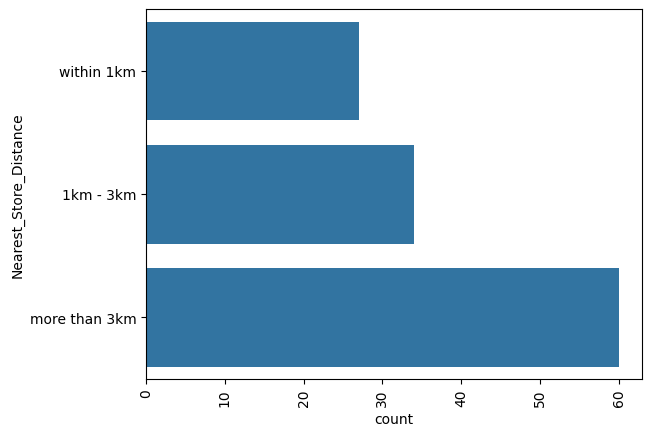

CountPlot for the column: Membership


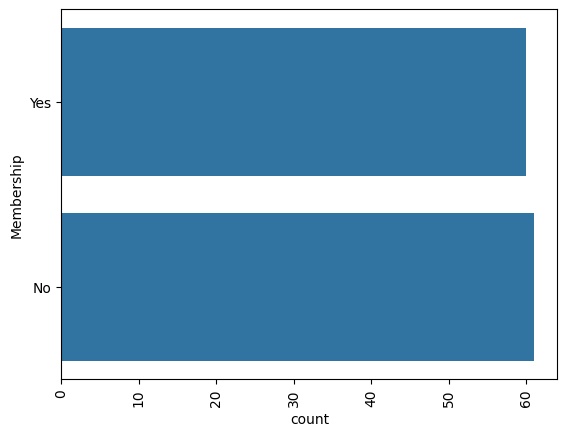

CountPlot for the column: Frequent_Product


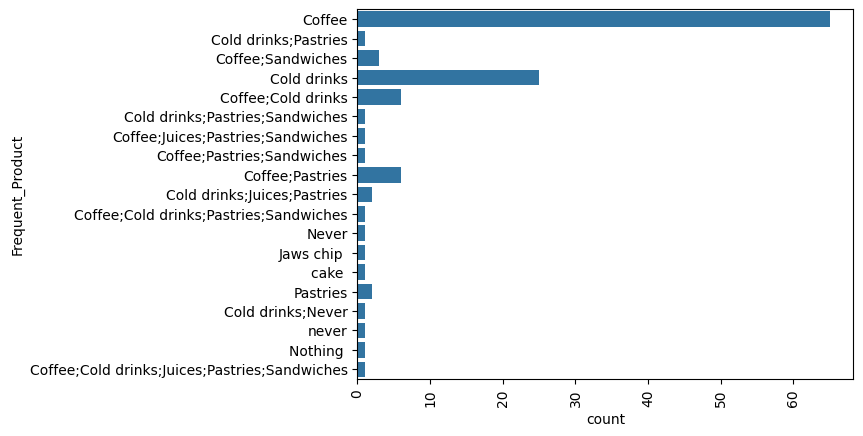

CountPlot for the column: Avg_Money_Spent


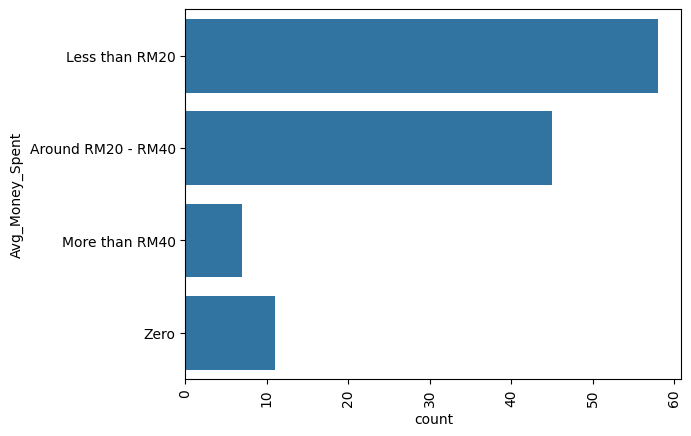

CountPlot for the column: Promotion_Source


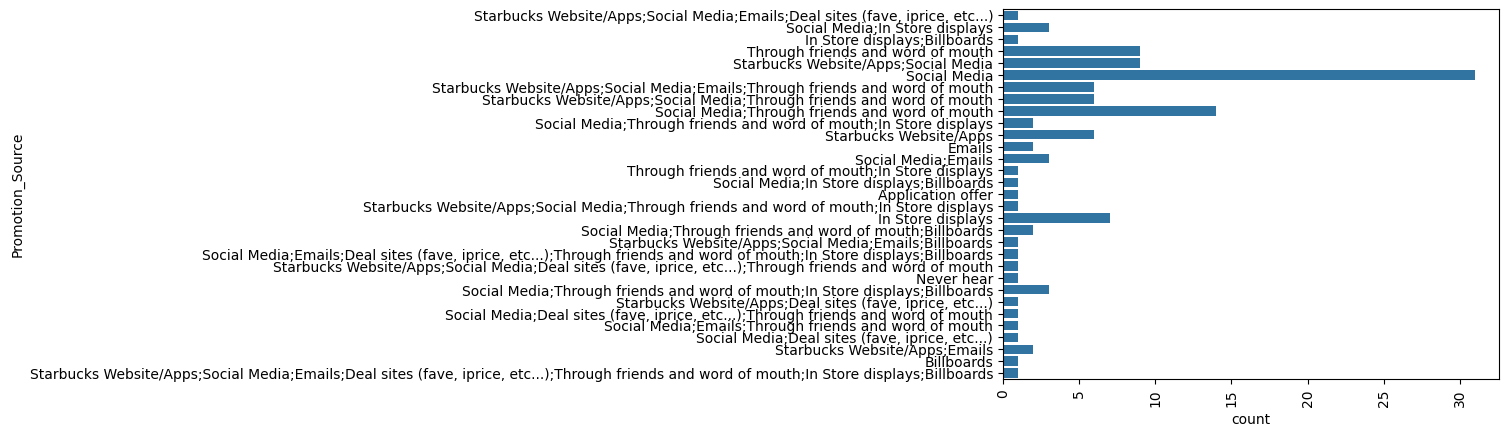

CountPlot for the column: Loyalty


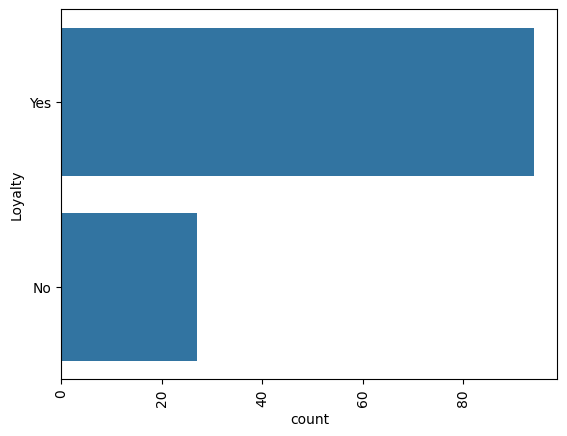

In [123]:
for i in cat_cols[1:]:
    print("CountPlot for the column: "+ i)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    plt.show()

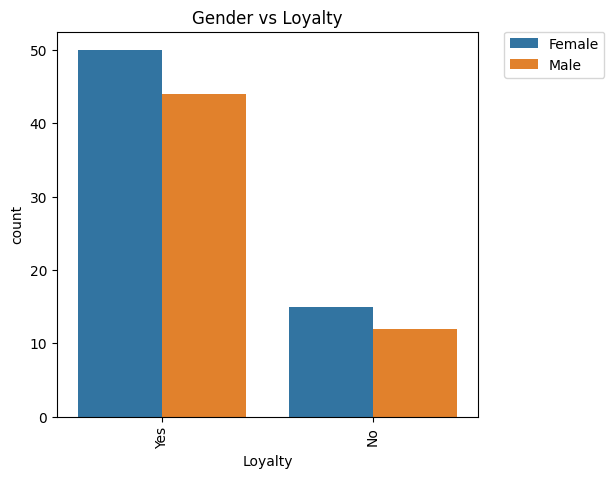

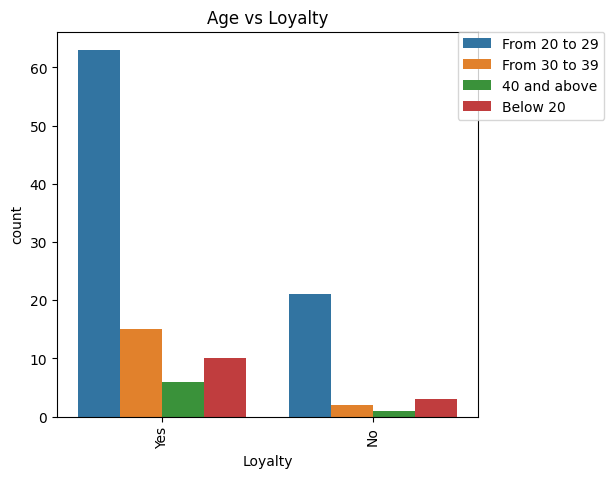

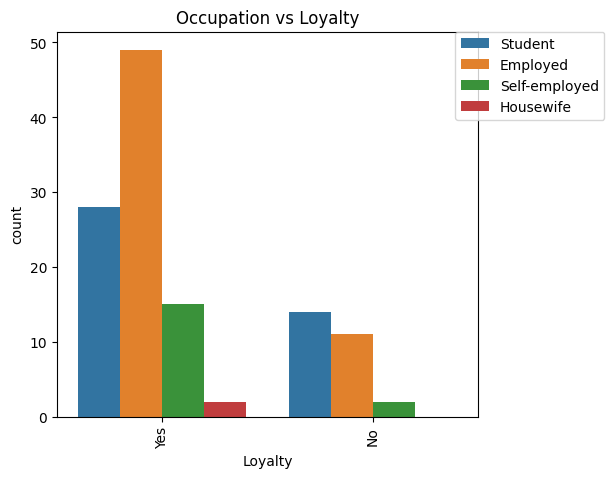

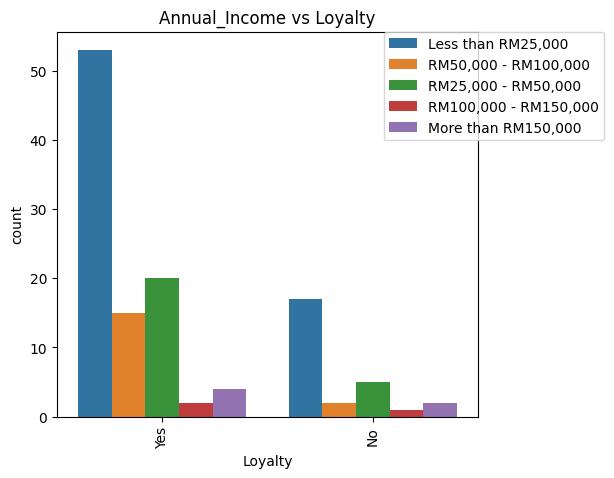

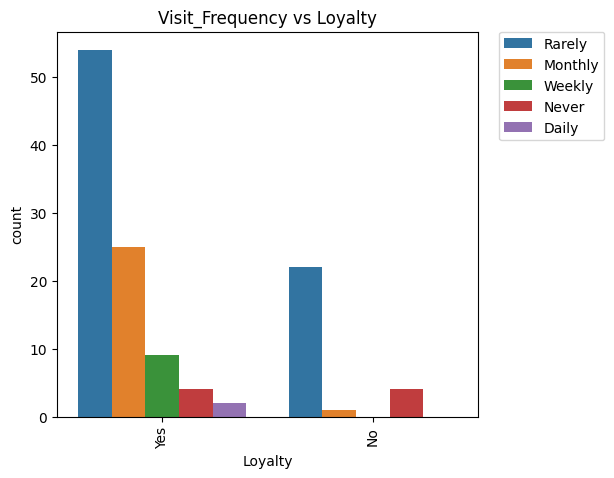

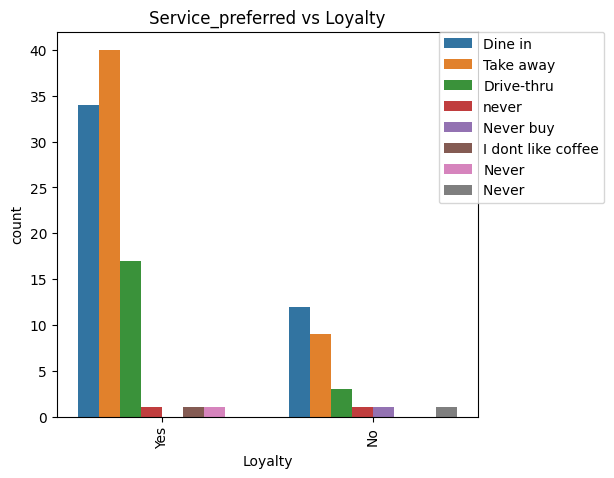

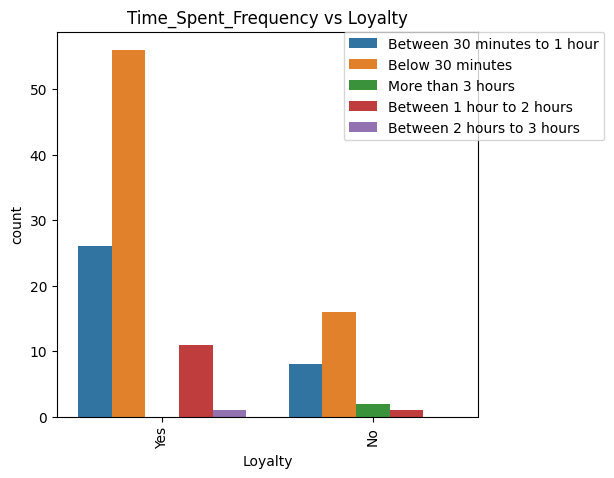

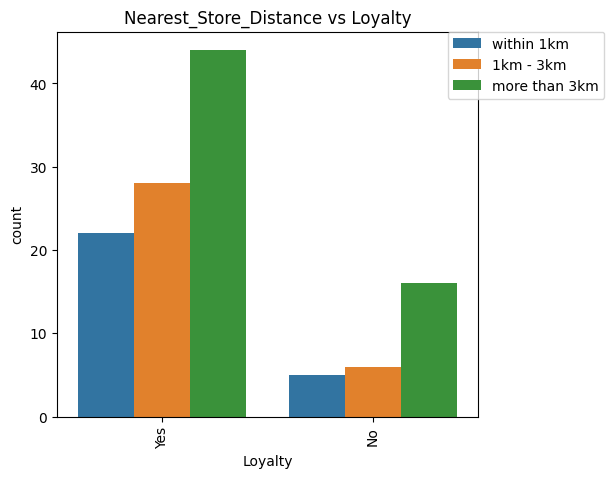

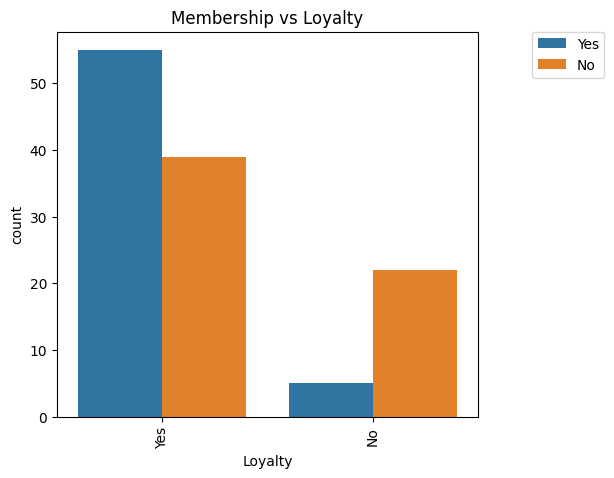

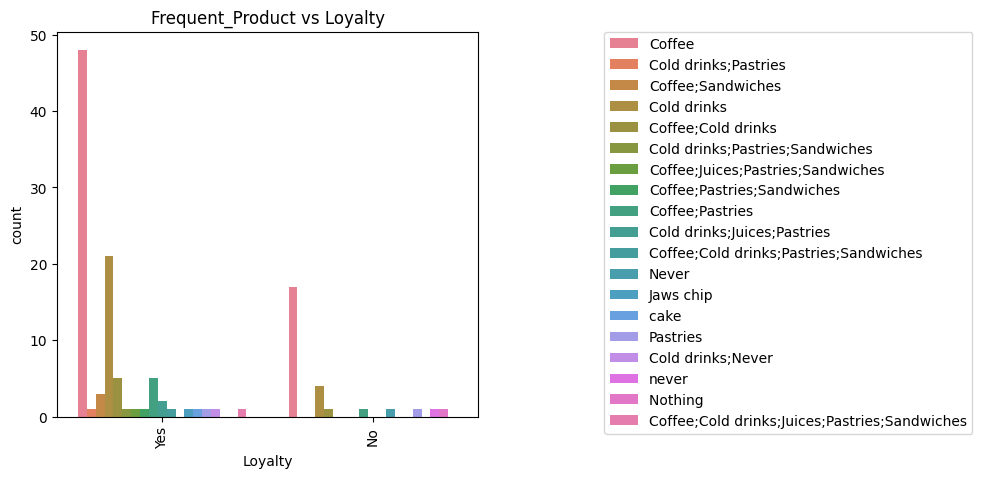

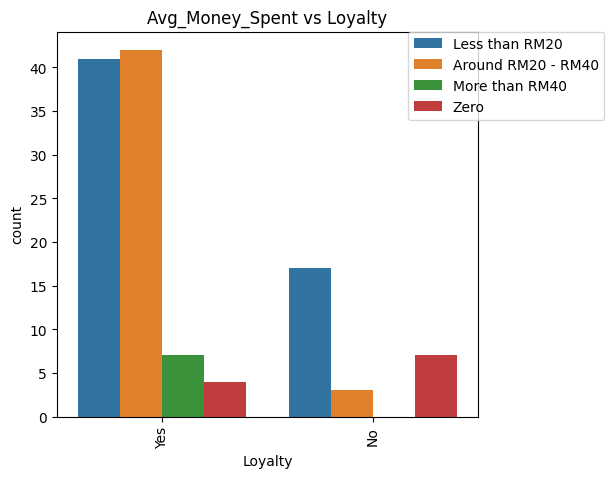

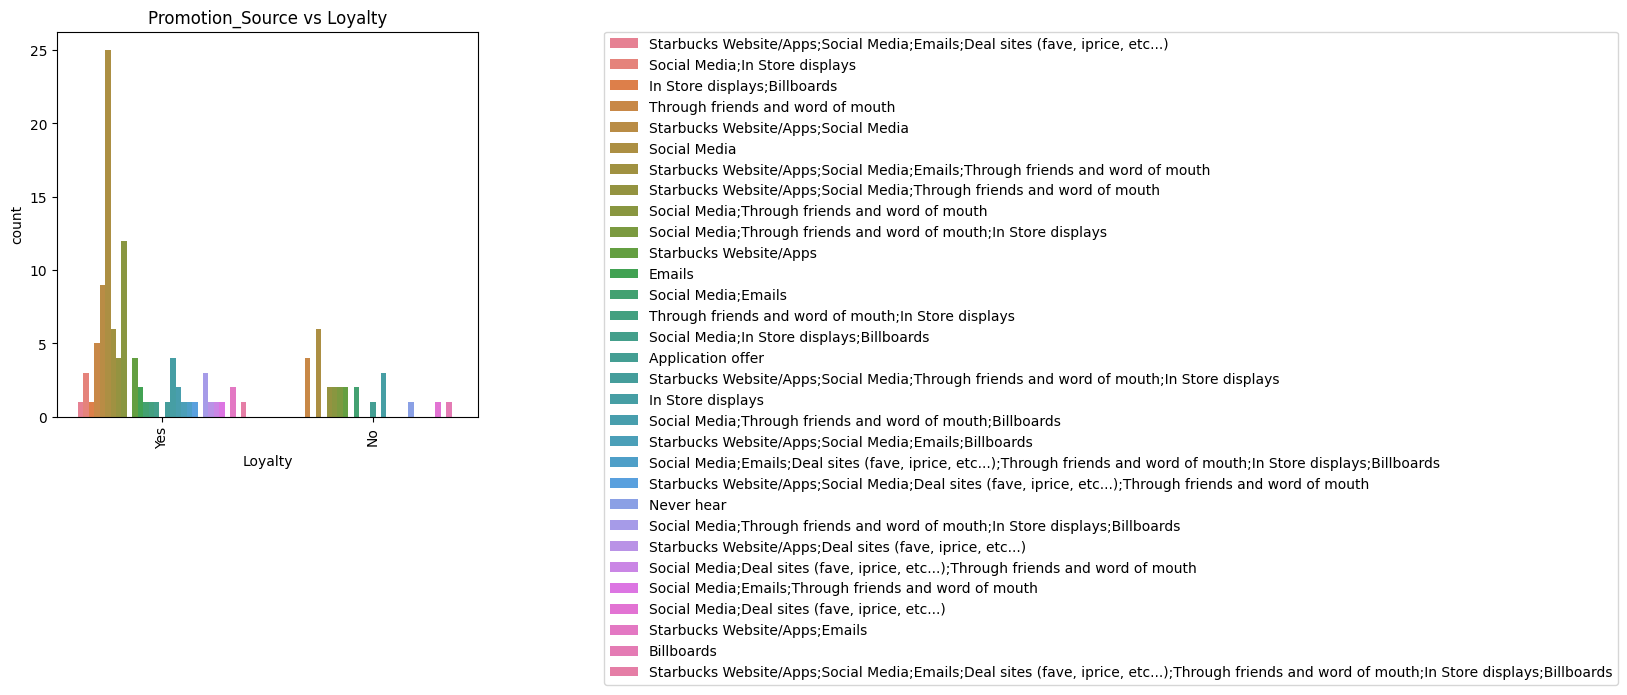

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


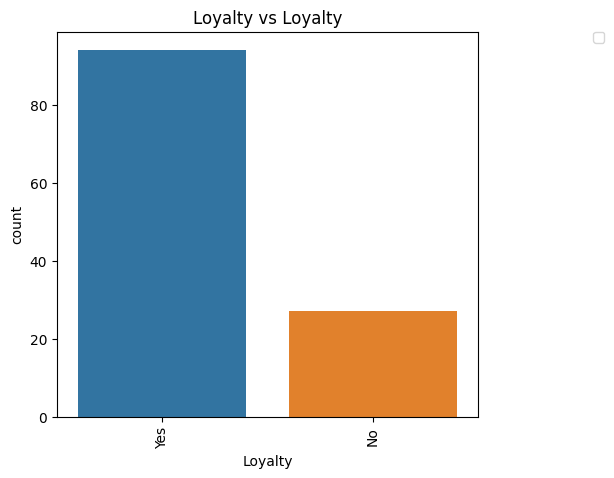

In [124]:
for i in cat_cols[1:]:
    plt.figure(figsize=(25,5))
    plt.subplot(1,4,1)
    sns.countplot(x=data.Loyalty, hue=data[i])
    plt.title(i+" vs Loyalty")
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
    plt.show()

In [126]:
data=data.drop(columns='Timestamp',axis=1)
#unwanted column


In [128]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [140]:
data['Gender']=le.fit_transform(data['Gender'])
data['Occupation']=le.fit_transform(data['Occupation'])
data['Visit_Frequency']=le.fit_transform(data['Visit_Frequency'])
data['Service_preferred']=le.fit_transform(data['Service_preferred'])
data['Membership']=le.fit_transform(data['Membership'])
data['Loyalty']=le.fit_transform(data['Loyalty'])
data['Annual_Income']=le.fit_transform(data['Annual_Income'])
data['Time_Spent_Frequency']=le.fit_transform(data['Time_Spent_Frequency'])
data['Age']=le.fit_transform(data['Age'])
data['Frequent_Product']=le.fit_transform(data['Frequent_Product'])
data['Avg_Money_Spent']=le.fit_transform(data['Avg_Money_Spent'])
data['Promotion_Source']=le.fit_transform(data['Promotion_Source'])
data['Nearest_Store_Distance']=le.fit_transform(data['Nearest_Store_Distance'])


In [141]:
data.tail()

,Gender,Age,Occupation,Annual_Income,Visit_Frequency,Service_preferred,Time_Spent_Frequency,Nearest_Store_Distance,Membership,Frequent_Product,Avg_Money_Spent,Quality_Rating_vs_Other_Brands,Price_Rating,Sales_Promotion_Importance,Ambiance_Rating,WiFi_Rating,Service_Rating,Meetings_hangouts_preference,Promotion_Source,Loyalty
117,1,0,2,3,1,0,1,0,1,0,0,3,3,5,3,2,4,4,21,1
118,1,2,0,0,1,0,1,0,1,2,2,5,5,5,5,5,5,5,25,1
119,1,2,3,0,3,0,3,0,0,1,1,3,2,4,3,3,3,4,16,0
120,0,2,0,0,3,6,0,2,0,0,1,4,4,4,4,4,4,4,15,1
121,1,2,0,4,3,0,3,0,0,0,1,1,1,5,4,3,3,2,3,0


In [152]:
x=data.drop('Loyalty',axis=1)
y=data.Loyalty

In [153]:
from imblearn.over_sampling import SMOTE
#dataargumentation using sysnthetic minority oversampling technique
x_arg,y_arg=SMOTE().fit_resample(x,y)

In [154]:
y_arg.value_counts()

Loyalty
1    94
0    94
Name: count, dtype: int64

In [156]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_arg,y_arg,test_size=0.2,random_state=42)
#spliting the dataset

In [157]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
#implementing randomforestclassifer

RandomForestClassifier()

In [158]:
y_pred=rfc.predict(x_test)

In [159]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [160]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.83      0.88      0.86        17

    accuracy                           0.87        38
   macro avg       0.87      0.87      0.87        38
weighted avg       0.87      0.87      0.87        38



In [170]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[18  3]
 [ 2 15]]


86.8421052631579

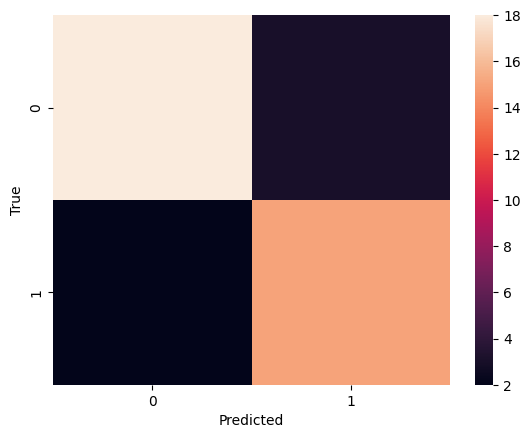

In [164]:
sns.heatmap(cm)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

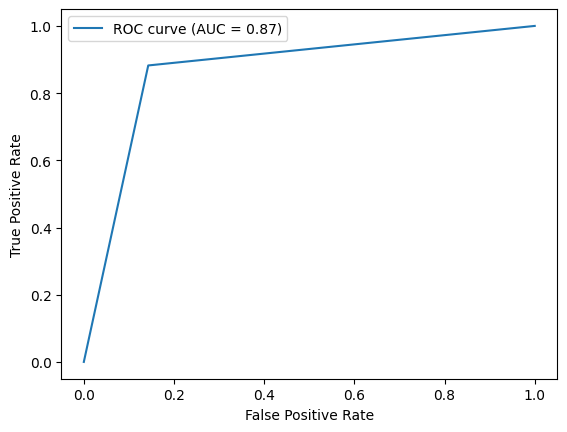

In [166]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
#roc curve is used to check the accuracy of predicted binary-classifer


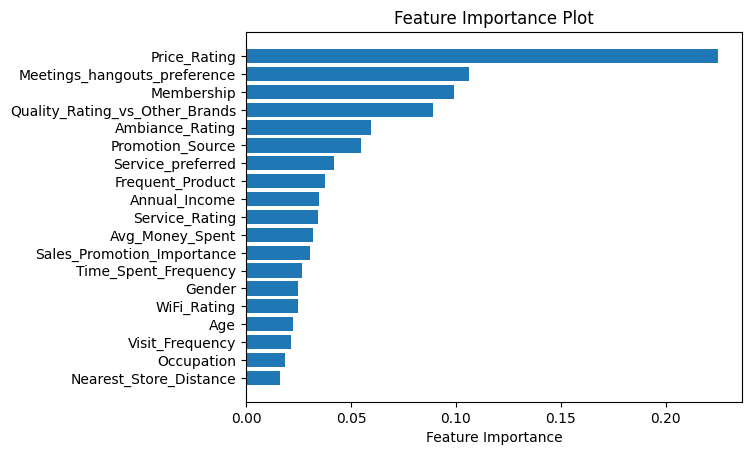

In [167]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
feature_importance = forest.feature_importances_
feature_names = x_train.columns
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.show()
